In [1]:
import os
import pickle
import numpy as np
import tarfile 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.preprocessing import StandardScaler

2025-07-09 11:24:40.236313: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-09 11:24:40.236360: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-09 11:24:40.237521: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-09 11:24:40.244682: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-09 11:24:41.112561: W tensorflow/compiler/tf2

In [2]:
file_path = '/home/nikola/Documents/Assignment-9/cifar-10-python.tar.gz'
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path='./cifar10_data')

def load_cifar_batch(filename):
    with open(filename, 'rb') as f:
        batch = pickle.load(f, encoding='latin1')
        data = batch['data']
        labels = batch['labels']
        data = data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        return data, np.array(labels)

x_train, y_train = [], []
for i in range(1, 6):
    data_batch, labels_batch = load_cifar_batch(f'./cifar10_data/cifar-10-batches-py/data_batch_{i}')
    x_train.append(data_batch)
    y_train.append(labels_batch)

x_train = np.concatenate(x_train)
y_train = np.concatenate(y_train)

x_test, y_test = load_cifar_batch('./cifar10_data/cifar-10-batches-py/test_batch')
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [3]:
def build_encoder():
    inputs = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    latent = layers.Dense(2, name='latent_vector')(x)
    return models.Model(inputs, latent, name='encoder')

def build_decoder():
    inputs = layers.Input(shape=(2,))
    x = layers.Dense(8 * 8 * 64, activation='relu')(inputs)
    x = layers.Reshape((8, 8, 64))(x)
    x = layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(32, 3, strides=2, activation='relu', padding='same')(x)
    outputs = layers.Conv2D(3, 3, activation='sigmoid', padding='same')(x)
    return models.Model(inputs, outputs, name='decoder')

encoder = build_encoder()
decoder = build_decoder()
autoencoder = models.Model(encoder.input, decoder(encoder.output))
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))


2025-07-09 11:24:44.080064: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-09 11:24:44.125302: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-07-09 11:24:44.953592: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10


2025-07-09 11:24:45.977866: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


196/196 [==============================] - ETA: 0s - loss: 0.0423

2025-07-09 11:25:36.552464: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.
2025-07-09 11:25:36.684195: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


196/196 [==============================] - 53s 266ms/step - loss: 0.0423 - val_loss: 0.0374
Epoch 2/10
196/196 [==============================] - 52s 266ms/step - loss: 0.0372 - val_loss: 0.0370
Epoch 3/10
196/196 [==============================] - 51s 259ms/step - loss: 0.0368 - val_loss: 0.0366
Epoch 4/10
196/196 [==============================] - 51s 258ms/step - loss: 0.0366 - val_loss: 0.0365
Epoch 5/10
196/196 [==============================] - 52s 263ms/step - loss: 0.0364 - val_loss: 0.0363
Epoch 6/10
196/196 [==============================] - 50s 257ms/step - loss: 0.0362 - val_loss: 0.0364
Epoch 7/10
196/196 [==============================] - 52s 266ms/step - loss: 0.0361 - val_loss: 0.0359
Epoch 8/10
196/196 [==============================] - 51s 262ms/step - loss: 0.0360 - val_loss: 0.0361
Epoch 9/10
196/196 [==============================] - 53s 272ms/step - loss: 0.0359 - val_loss: 0.0358
Epoch 10/10
196/196 [==============================] - 50s 256ms/step - loss: 0.0357

In [4]:
features_autoencoder = encoder.predict(x_test)

 33/313 [==>...........................] - ETA: 0s

2025-07-09 11:33:21.717597: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, VGG16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
import time

# Assume x_test is already loaded and normalized to [0,1], shape = (10000, 32, 32, 3)

# Resize and preprocess for MobileNetV2
x_test_resized_mobilenet = tf.image.resize(x_test[:1000], [224, 224])
x_test_mobilenet = mobilenet_preprocess(x_test_resized_mobilenet.numpy())

# Load MobileNetV2
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Predict features from MobileNetV2
print("Extracting features with MobileNetV2...")
mobilenet_features = mobilenet.predict(x_test_mobilenet, batch_size=32, verbose=1)

# Resize and preprocess for VGG16
x_test_resized_vgg = tf.image.resize(x_test[:1000], [224, 224])
x_test_vgg = vgg_preprocess(x_test_resized_vgg.numpy())

# Load VGG16
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Predict features from VGG16
print("Extracting features with VGG16...")
start = time.time()
vgg_features = vgg_model.predict(x_test_vgg, batch_size=32, verbose=1)
end = time.time()
print("Time taken by VGG16:", end - start, "seconds")

Extracting features with MobileNetV2...
32/32 [==============================] - 10s 282ms/step
Extracting features with VGG16...
32/32 [==============================] - 92s 3s/step
Time taken by VGG16: 94.71190333366394 seconds


32/32 [==============================] - 91s 3s/step


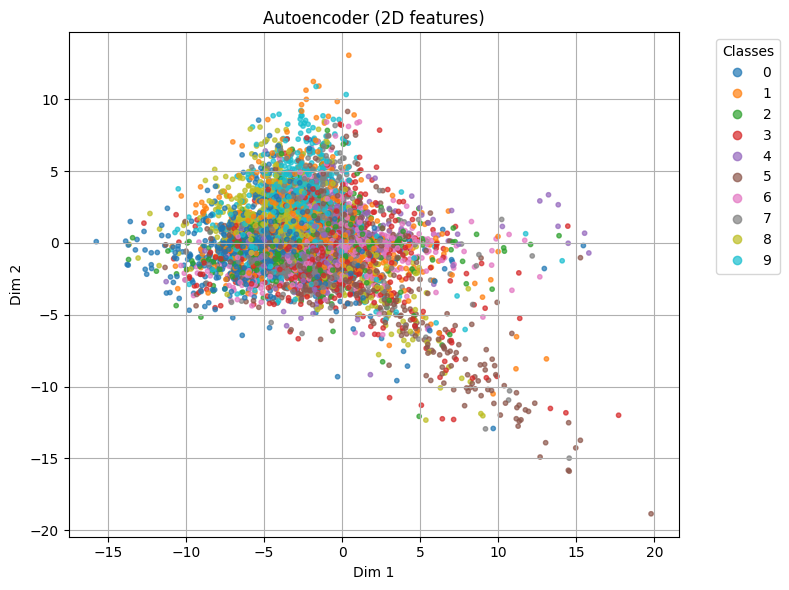

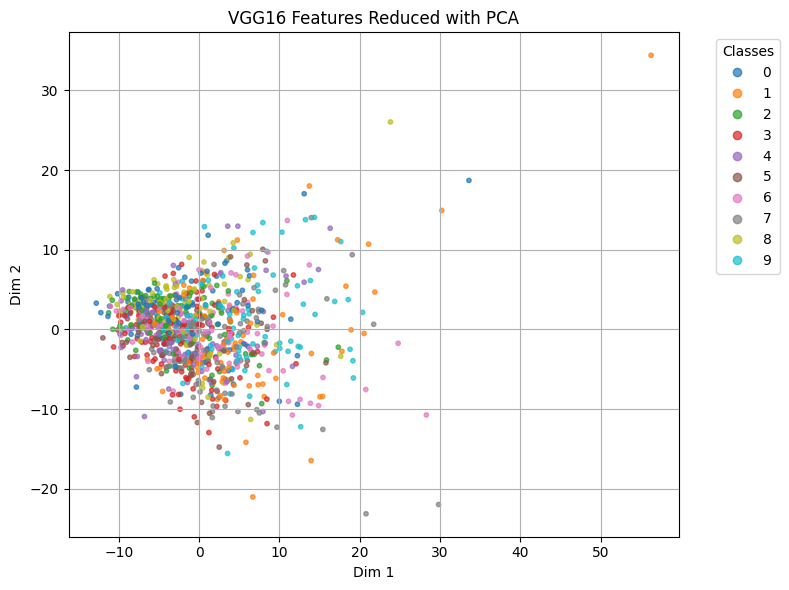

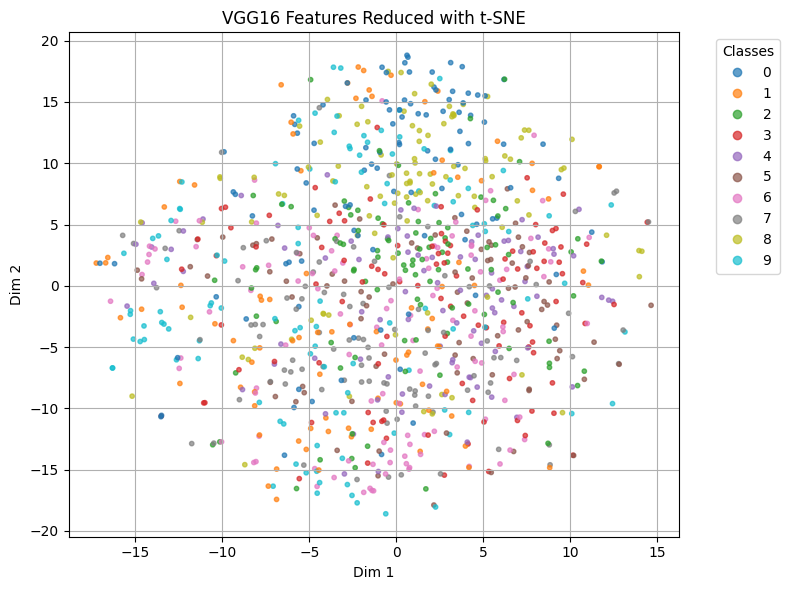

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Standardize VGG features
scaler = StandardScaler()
# Extract features from VGG16
vgg_features = vgg_model.predict(x_test_vgg, batch_size=32, verbose=1)

# Flatten the features: (num_samples, height, width, channels) → (num_samples, height*width*channels)
vgg_flattened = vgg_features.reshape(vgg_features.shape[0], -1)

# Now you can standardize and reduce dimension
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
vgg_scaled = scaler.fit_transform(vgg_flattened)


# 2. PCA
pca_2d = PCA(n_components=2).fit_transform(vgg_scaled)

# 3. t-SNE (often slower, do on subset if needed)
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(vgg_scaled[:1000])

def plot_features(features, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='tab10', s=10, alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(title)
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot with correctly matched labels
plot_features(features_autoencoder, y_test[:features_autoencoder.shape[0]], "Autoencoder (2D features)")
plot_features(pca_2d, y_test[:pca_2d.shape[0]], "VGG16 Features Reduced with PCA")
plot_features(tsne_2d, y_test[:tsne_2d.shape[0]], "VGG16 Features Reduced with t-SNE")
